<h1 style = 'color: seagreen' align = "center"> Mô hình dự đoán xác suất mắc bệnh đột quỵ (Stroke Prediction Model) </h1>

<img
src="https://vinmec-prod.s3.amazonaws.com/images/20220223_110118_998822_dot-quy-va-tai-bien.max-1800x1800.jpg" width="800" align="center">

<h1>Mục lục</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Understandthedataset">Tìm hiểu về bộ dữ liệu (Understand the dataset)</a></li>
        <li><a href="https://#eda">Phân tích dữ liệu (Exploratory Data Analysis)</a></li>
        <li><a href="https://#preprocessing">Tiền xử lí dữ liệu (Data Preprocessing)</a></li>
        <li><a href="https://#modeling">Huấn luyện và đánh giá (Modeling and Evaluation)</a></li>
        <li><a href="https://#evaluation">Đưa ra kết quả (Output)</a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="Understand the dataset">1) Tìm hiểu về bộ dữ liệu (Understand the dataset)</h2>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Khai báo thư viện (Import library packages)</b></p>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 |Tải bộ dữ liệu (Import dataset)</b></p>
</div>

In [3]:
df = pd.read_csv('E:\StrokeProject\Stroke_dataset.csv')
df

,Unnamed: 0,age,gender,height,weight,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
0,0,50,Male,168,62.0,Private,90,Normal,0,94,0,1,0
1,1,55,Female,156,85.0,Other,106,High,0,97,0,1,1
2,2,51,Female,165,64.0,Govt_job,90,High,0,114,0,0,1
3,3,48,Male,169,82.0,Private,116,Normal,0,59,0,1,1
4,4,47,Female,156,56.0,Govt_job,73,Normal,0,71,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,52,Male,168,76.0,Self-employed,93,Normal,1,86,0,1,0
69996,69996,61,Female,158,126.0,Govt_job,106,Above Normal,0,168,0,1,1
69997,69997,52,Male,183,105.0,Other,120,High,0,60,1,0,1
69998,69998,61,Female,163,72.0,Private,98,Normal,0,166,0,0,1


In [4]:
# Đầu tiên xóa cột unnamed
df.drop('Unnamed: 0',axis = 1, inplace = True)
df_orgin = df # Create a copy
df

,age,gender,height,weight,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
0,50,Male,168,62.0,Private,90,Normal,0,94,0,1,0
1,55,Female,156,85.0,Other,106,High,0,97,0,1,1
2,51,Female,165,64.0,Govt_job,90,High,0,114,0,0,1
3,48,Male,169,82.0,Private,116,Normal,0,59,0,1,1
4,47,Female,156,56.0,Govt_job,73,Normal,0,71,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,Male,168,76.0,Self-employed,93,Normal,1,86,0,1,0
69996,61,Female,158,126.0,Govt_job,106,Above Normal,0,168,0,1,1
69997,52,Male,183,105.0,Other,120,High,0,60,1,0,1
69998,61,Female,163,72.0,Private,98,Normal,0,166,0,0,1


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉Thông tin về bộ dữ liệu huấn luyện (Dataset Information)|</b></p>
</div>

**Input**
* 1) **age:** Tuổi của bệnh nhân (tính theo năm).
* 2) **gender:** Giới tính (Male, Female).
* 3) **height:** Chiều cao (cm).
* 4) **weight:** Cân nặng (kg).
* 5) **work_type:** Private(Làm cho tư nhân), Govt_job(Làm việc nhà nước), Self-employed (Tự quản lí), Other (Khác).
* 6) **mean_blood_pressure:** Chỉ số huyết áp trung bình (mmHg).
* 7) **cholesterol:** Mức độ cholesterol (Normal, Above Normal, High).
* 8) **avg_glu_level:** Lượng đường huyết trung bình.
* 9) **alcohol:** Sử dụng rượu, bia (1: Có, 2: Không).
* 10) **active:** Mức độ vận động cơ thể (1: Thường xuyên, 0: Ít hoặc không vận động).

**Output**
* 11) **stroke:** Kết quả của bệnh nhân (1: Đột quỵ, 0: Không đột quỵ).

In [5]:
df.shape
# Tập dữ liệu gồm 70000 điểm, mỗi điểm có 12 features, bao gồm cả biến output (stroke)

(70000, 12)

Để giảm kích thước của tập dữ liệu, ta sẽ thay thế cột "height" và "weight" bởi chỉ số BMI, đảm bảo không làm mất đi nhiều lượng thông tin của dữ liệu.

![](https://i.postimg.cc/kgd3LTBT/ae4498b42e31d75d05e764105a9e981a.jpg)

In [6]:
# BMI = weight(kg)/height(m)^2
bmi = np.round((df.weight)/(df.height/100)**2,1) 
bmi

0        22.0
1        34.9
2        23.5
3        28.7
4        23.0
         ... 
69995    26.9
69996    50.5
69997    31.4
69998    27.1
69999    24.9
Length: 70000, dtype: float64

In [7]:
# Detele height and weight
df.drop(['height','weight'],axis = 1 ,inplace = True)

In [8]:
# Insert bmi column
df.insert(2,'BMI',bmi)
df

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
0,50,Male,22.0,Private,90,Normal,0,94,0,1,0
1,55,Female,34.9,Other,106,High,0,97,0,1,1
2,51,Female,23.5,Govt_job,90,High,0,114,0,0,1
3,48,Male,28.7,Private,116,Normal,0,59,0,1,1
4,47,Female,23.0,Govt_job,73,Normal,0,71,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,Male,26.9,Self-employed,93,Normal,1,86,0,1,0
69996,61,Female,50.5,Govt_job,106,Above Normal,0,168,0,1,1
69997,52,Male,31.4,Other,120,High,0,60,1,0,1
69998,61,Female,27.1,Private,98,Normal,0,166,0,0,1


Sau bước 1, ta thu được bộ dữ liệu để đưa vào phân tích như trên.

<h2 id="eda">2) Phân tích dữ liệu (Exploratory Data Analysis) </h2>

In [9]:
# Kiểm tra xem có thông tin bị mất trong tập dữ liệu không
df.isnull().sum()

age                    0
gender                 0
BMI                    0
work_type              0
mean_blood_pressure    0
cholesterol            0
smoke                  0
avg_glu_level          0
alcohol                0
active                 0
stroke                 0
dtype: int64

**Nhận xét:** Không có dữ liệu bị mất 

In [10]:
# Xuất ra thông tin chung của tập dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  70000 non-null  int64  
 1   gender               70000 non-null  object 
 2   BMI                  70000 non-null  float64
 3   work_type            70000 non-null  object 
 4   mean_blood_pressure  70000 non-null  int64  
 5   cholesterol          70000 non-null  object 
 6   smoke                70000 non-null  int64  
 7   avg_glu_level        70000 non-null  int64  
 8   alcohol              70000 non-null  int64  
 9   active               70000 non-null  int64  
 10  stroke               70000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 5.9+ MB


In [11]:
# Miêu tả tập dữ liệu
df.describe()

,age,BMI,mean_blood_pressure,smoke,avg_glu_level,alcohol,active,stroke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,27.555311,107.010086,0.088129,97.727086,0.053771,0.803729,0.499700
std,6.766774,6.092596,136.491944,0.283484,43.628390,0.225568,0.397179,0.500003
min,29.000000,3.500000,-41.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,48.000000,23.900000,93.000000,0.000000,69.000000,0.000000,1.000000,0.000000
50%,53.000000,26.400000,93.000000,0.000000,88.000000,0.000000,1.000000,0.000000
75%,58.000000,30.200000,103.000000,0.000000,107.000000,0.000000,1.000000,1.000000
max,64.000000,298.700000,7400.000000,1.000000,249.000000,1.000000,1.000000,1.000000


**Nhận xét:** 
* Giá trị nhỏ nhất của cột 'mean_blood_pressure' là số âm.
* Giá trị lớn nhất của cột 'BMI' là 298 là số quá lớn 
* Giá trị lớn nhất của 'mean_blood_pressure' cũng là một số quá lớn

**Những giá trị không bình thường cần được loại bỏ để làm sạch bộ dữ liệu và tăng độ chính xác của thuật toán.**

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 Loại bỏ outlier </b></p>
</div>


Outlier is an extremely high or extremely low value in our data.

Outlier xuất hiện ở những cột có giá trị là số (numeric data), ta lưu các cột có dữ liệu số bao gồm age, BMI, mean_blood_pressure, avg_glu_level. Các dữ liệu dạng binary và categorical không có outlier do chỉ có một số giá trị nhất định.

In [12]:
outlier_col = ['age','BMI','mean_blood_pressure','avg_glu_level']

**Trước tiên loại bỏ những cột có giá trị nhỏ hơn hoặc bằng 0 trong outlier_col**

In [13]:
# Age
df[df['age']<=0]
# Kết quả: Không có

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke


In [14]:
# BMI
df[df['BMI']<=0]
# Kết quả: Không có

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke


In [15]:
# mean_blood_pressure
df[df['mean_blood_pressure']<=0]
# Kết quả: Có 1 hàng ở chỉ số 60106, ta loại điểm dữ liệu này

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
60106,61,Female,26.5,Self-employed,-41,Normal,0,109,0,1,1


In [16]:
df.drop(df.index[60106],inplace = True)
df

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
0,50,Male,22.0,Private,90,Normal,0,94,0,1,0
1,55,Female,34.9,Other,106,High,0,97,0,1,1
2,51,Female,23.5,Govt_job,90,High,0,114,0,0,1
3,48,Male,28.7,Private,116,Normal,0,59,0,1,1
4,47,Female,23.0,Govt_job,73,Normal,0,71,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,Male,26.9,Self-employed,93,Normal,1,86,0,1,0
69996,61,Female,50.5,Govt_job,106,Above Normal,0,168,0,1,1
69997,52,Male,31.4,Other,120,High,0,60,1,0,1
69998,61,Female,27.1,Private,98,Normal,0,166,0,0,1


In [17]:
# avg_glu_level
df[df['mean_blood_pressure']<=0]
# Kết quả: Không có

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke


In [18]:
# Reset lại index cho df
df.reset_index(drop = True)

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
0,50,Male,22.0,Private,90,Normal,0,94,0,1,0
1,55,Female,34.9,Other,106,High,0,97,0,1,1
2,51,Female,23.5,Govt_job,90,High,0,114,0,0,1
3,48,Male,28.7,Private,116,Normal,0,59,0,1,1
4,47,Female,23.0,Govt_job,73,Normal,0,71,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69994,52,Male,26.9,Self-employed,93,Normal,1,86,0,1,0
69995,61,Female,50.5,Govt_job,106,Above Normal,0,168,0,1,1
69996,52,Male,31.4,Other,120,High,0,60,1,0,1
69997,61,Female,27.1,Private,98,Normal,0,166,0,0,1


**Loại bỏ những giá trị quá lớn hoặc quá nhỏ bằng cách sử dụng tứ phân vị**

 ( Greater than Q3 + 1.5 * IQR ) OR ( Lower than Q1 -1.5 * IQR )

  where,
  Q1  = First quartile
  
  Q3  = Third quartile
  
  IQR = Interquartile range (Q3 - Q1)

In [19]:
#Chương trình phát hiện outlier:
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + 1.5*IQR
    lower_threshold = Q1 - 1.5*IQR
    outlier = dataframe[(dataframe < lower_threshold) | (dataframe > upper_threshold)]
    return outlier

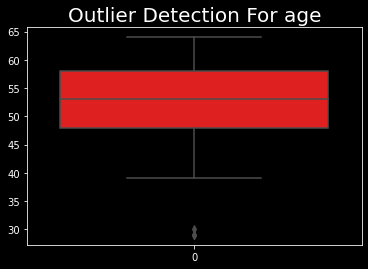

6219     29
22343    29
30666    29
55905    30
Name: age, dtype: int64


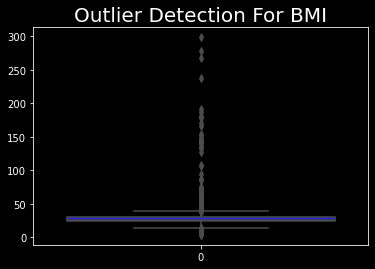

30       43.7
46       40.8
83       47.6
88       40.3
212      40.0
         ... 
69588    42.0
69708    55.5
69946    42.8
69985    41.9
69996    50.5
Name: BMI, Length: 2034, dtype: float64


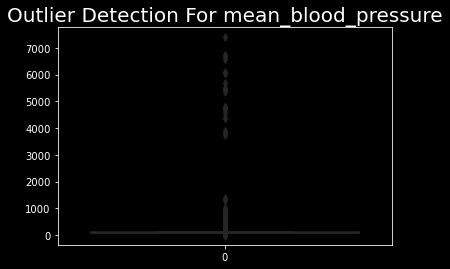

4         73
9         76
23        76
50        73
56        70
        ... 
69937     70
69967    713
69978     70
69979    120
69997    120
Name: mean_blood_pressure, Length: 6329, dtype: int64


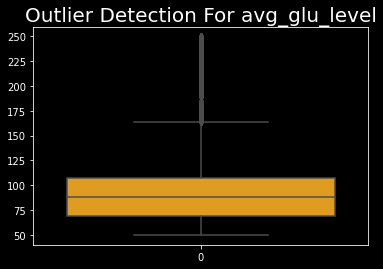

7        248
17       241
29       225
53       202
56       167
        ... 
69938    230
69956    208
69981    165
69996    168
69998    166
Name: avg_glu_level, Length: 6952, dtype: int64


In [20]:
# Dùng boxplot để minh họa outlier
list_color = ['red', 'blue','green','orange']
for i,col in zip(outlier_col,list_color):
    sns.boxplot(data = df[i],color = col)
    plt.title("Outlier Detection For {}".format(i),fontsize = 20)
    plt.show()
    print(outlier_detection(df[i]))

#### Nhận xét:
 * **Age**: Có 4 ouliers, tuy nhiên nó không ảnh hưởng nhiều tới quá trình thực hiện thuật toán nên có thể không loại bỏ.
 * **BMI**: Có rất nhiều outliers, theo thực tế thì chỉ số BMI vượt quá 50 là khó có thể xảy ra, vì vậy ta sẽ loại bỏ những điểm dữ liệu có BMI > 50.
 * **mean_blood_pressure**: Có rất nhiều outliers, theo thực tế người bình thường thì mean_blood_pressure <= 93, người bị high blood pressure thì mean_blood_pressure > 106,7. Để cho dữ liệu phong phú, ta sẽ chọn mốc 120 và loại bỏ những điểm có mean_blood_pressure > 120.
 https://www.cdc.gov/bloodpressure/about.htm
 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4974855/#:~:text=Therefore%2C%20mean%20blood%20pressure%20(MBP,(SBP)%20%E2%80%93%20DBP%5D.
 * **avg_glu_level**: Có rất nhiều outliers, theo thực tế lượng khoảng lượng đường trung bình là từ trên 60 đến lớn hơn 200. Ta sẽ chọn mốc từ 60 đến 230, loại bỏ các điểm dữ liệu nằm ngoài khoảng này.


In [20]:
# Outlier remove with BMI
remove_BMI = list(df[(df['BMI'] >= 50)].index)
remove_mean_blood_pressure = list(df[df['mean_blood_pressure']>120].index)
remove_avg_glu = list(df[(df['avg_glu_level']>=230) | (df['avg_glu_level']<=60)].index)
remove_index = set(remove_BMI+remove_mean_blood_pressure+remove_avg_glu)
len(remove_index)
# # Có tất cả 13996 điểm dữ liệu outlier nằm ngoài các khoảng xác định trên

13966

In [21]:
#Remove outlier
data = df.drop(df.index[list(remove_index)])
data # Bộ dữ liệu sau khi loại Outlier còn 56033 điểm dữ liệu

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
0,50,Male,22.0,Private,90,Normal,0,94,0,1,0
1,55,Female,34.9,Other,106,High,0,97,0,1,1
2,51,Female,23.5,Govt_job,90,High,0,114,0,0,1
4,47,Female,23.0,Govt_job,73,Normal,0,71,0,0,0
5,60,Female,29.4,Private,93,Above Normal,0,156,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69992,51,Female,21.6,Self-employed,116,Normal,0,83,0,1,1
69993,53,Female,23.7,Other,103,Normal,0,57,0,1,1
69995,52,Male,26.9,Self-employed,93,Normal,1,86,0,1,0
69996,61,Female,50.5,Govt_job,106,Above Normal,0,168,0,1,1


In [22]:
data = data.reset_index(drop=True)
data.index

RangeIndex(start=0, stop=56033, step=1)

In [23]:
#Recheck outlier
remove_BMI_second = list(data[(data['BMI'] >= 50)].index)
remove_mean_blood_pressure_second = list(data[data['mean_blood_pressure']>120].index)
remove_avg_glu_second = list(data[(data['avg_glu_level']>=230) | (data['avg_glu_level']<=60)].index)
remove_index_second = set(remove_BMI_second+remove_mean_blood_pressure_second+remove_avg_glu_second)
len(remove_index_second)
# Do dữ liệu lớn, nên sau khi loại bỏ outlier ở trên thì bộ dữ liệu mới data vẫn còn 1592 outliers

1592

In [24]:
# Remove outliers second time
data_ = data.drop(data.index[list(remove_index_second)])
data_

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
0,50,Male,22.0,Private,90,Normal,0,94,0,1,0
1,55,Female,34.9,Other,106,High,0,97,0,1,1
2,51,Female,23.5,Govt_job,90,High,0,114,0,0,1
3,47,Female,23.0,Govt_job,73,Normal,0,71,0,0,0
4,60,Female,29.4,Private,93,Above Normal,0,156,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
56026,41,Female,25.5,Govt_job,83,Normal,0,67,0,1,1
56027,56,Female,28.5,Govt_job,103,Above Normal,0,155,0,1,0
56028,51,Female,21.6,Self-employed,116,Normal,0,83,0,1,1
56030,52,Male,26.9,Self-employed,93,Normal,1,86,0,1,0


In [25]:
# Recheck 
remove_BMI_third = list(data_[(data_['BMI'] >= 50)].index)
remove_mean_blood_pressure_third = list(data_[data_['mean_blood_pressure']>120].index)
remove_avg_glu_third = list(data_[(data_['avg_glu_level']>=230) | (data_['avg_glu_level']<=60)].index)
remove_index_third = set(remove_BMI_third+remove_mean_blood_pressure_third+remove_avg_glu_third)
len(remove_index_third)

0

Vậy sau 3 lần check thì outlier đã được loại bỏ hết. Ta thu được data_ là bộ dữ liệu cuối cùng. Lưu bộ data sau khi xử lí vào biến data_after.

In [26]:
data_after = data_.reset_index(drop=True)
data_after
#Sau khi loại bỏ hết outliers thì còn 54441 điểm dữ liệu.

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
0,50,Male,22.0,Private,90,Normal,0,94,0,1,0
1,55,Female,34.9,Other,106,High,0,97,0,1,1
2,51,Female,23.5,Govt_job,90,High,0,114,0,0,1
3,47,Female,23.0,Govt_job,73,Normal,0,71,0,0,0
4,60,Female,29.4,Private,93,Above Normal,0,156,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
54436,41,Female,25.5,Govt_job,83,Normal,0,67,0,1,1
54437,56,Female,28.5,Govt_job,103,Above Normal,0,155,0,1,0
54438,51,Female,21.6,Self-employed,116,Normal,0,83,0,1,1
54439,52,Male,26.9,Self-employed,93,Normal,1,86,0,1,0


In [27]:
#Check missing value
data_after.isnull().sum()

age                    0
gender                 0
BMI                    0
work_type              0
mean_blood_pressure    0
cholesterol            0
smoke                  0
avg_glu_level          0
alcohol                0
active                 0
stroke                 0
dtype: int64

In [28]:
#Phân bố của categorical data and binary data
cat_cols = ['gender','work_type','cholesterol','alcohol','active']
for i in cat_cols:
    print(f'============Values in {i}============\n{data_after[i].value_counts()}\n------------------------')

============Values in gender============
Female    35441
Male      19000
Name: gender, dtype: int64
------------------------
============Values in work_type============
Private          13714
Other            13638
Self-employed    13580
Govt_job         13509
Name: work_type, dtype: int64
------------------------
============Values in cholesterol============
Normal          41266
Above Normal     7568
High             5607
Name: cholesterol, dtype: int64
------------------------
============Values in alcohol============
0    51561
1     2880
Name: alcohol, dtype: int64
------------------------
============Values in active============
1    43725
0    10716
Name: active, dtype: int64
------------------------


**Nhận xét**: Số điểm dữ liệu ở mỗi loại trong cột có sự mất cân bằng (Imbalanced). Điều này ảnh hướng tới phân bố dữ liệu cũng như hiệu quả của thuật toán máy học.

In [29]:
data_after['stroke'].value_counts()

0    28059
1    26382
Name: stroke, dtype: int64

**Nhận xét**: Số lượng thuộc hai class của output tương đối gần nhau nên có thể coi là output của tập dữ liệu được cân bằng.

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 Data Visualization </b></p>
</div>


**So sánh đồ thị phân bố giữa các biến numeric**

In [30]:
def plot_contribution(df):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
    df.plot(kind="hist", y="BMI", bins=5, color="r", ax=axes[0][1])
    df.plot(kind="hist", y="mean_blood_pressure", bins=5, color="g", ax=axes[1][0])
    df.plot(kind="hist", y="avg_glu_level", bins=150, color="orange", ax=axes[1][1])
    plt.show()
def distplot(df):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    sns.distplot(df["age"], color="b",bins = 70 ,ax=axes[0][0])
    sns.distplot(df['BMI'], color="r",bins = 5 ,ax=axes[0][1])
    sns.distplot(df["mean_blood_pressure"], color="g", ax=axes[1][0])
    sns.distplot(df["avg_glu_level"], color="orange", ax=axes[1][1])
    plt.show()

#### Đồ thị phân bố của numeric data trước khi xử lí

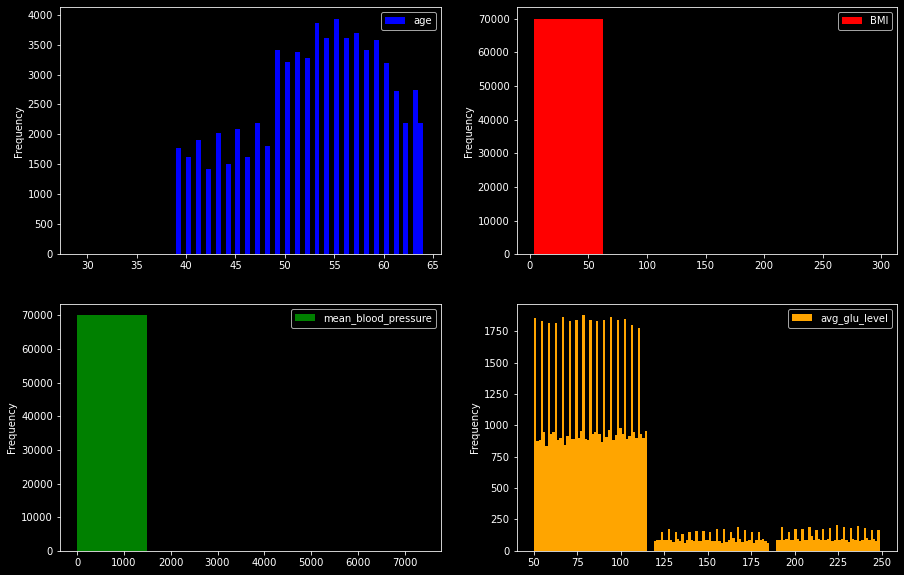

In [31]:
# Phân bố dữ liệu trước khi xử lí outlier
plot_contribution(df)

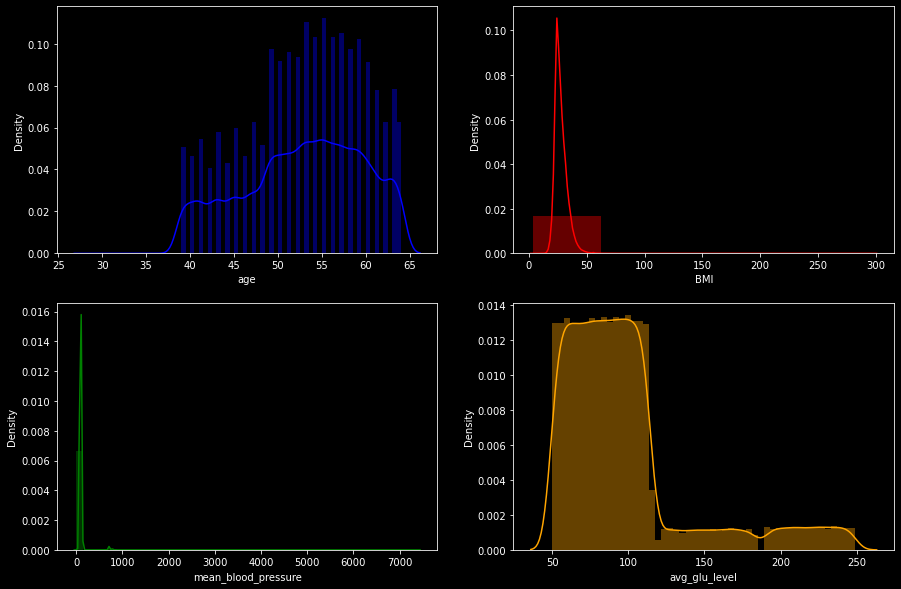

In [32]:
distplot(df)

#### Đồ thị phân bố của numeric data sau khi xử lí

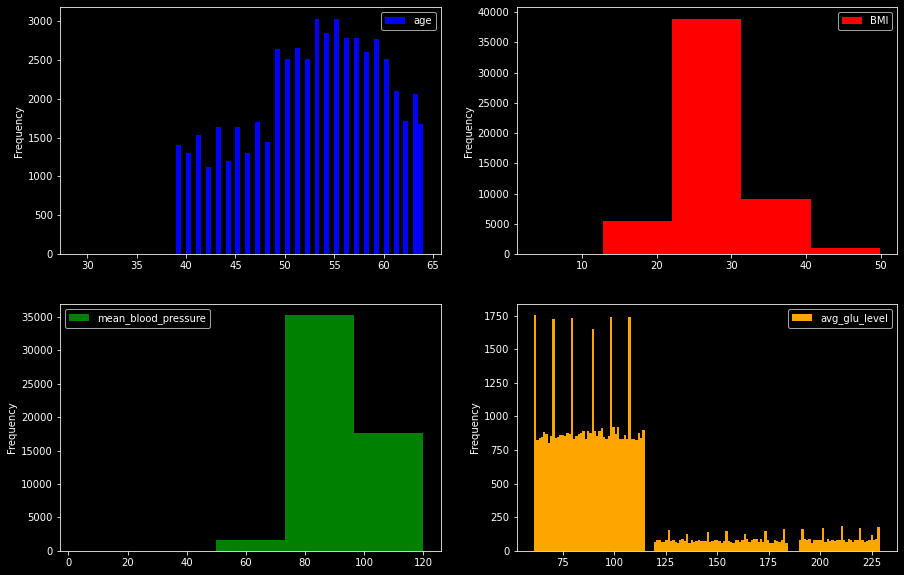

In [33]:
plot_contribution(data_after)

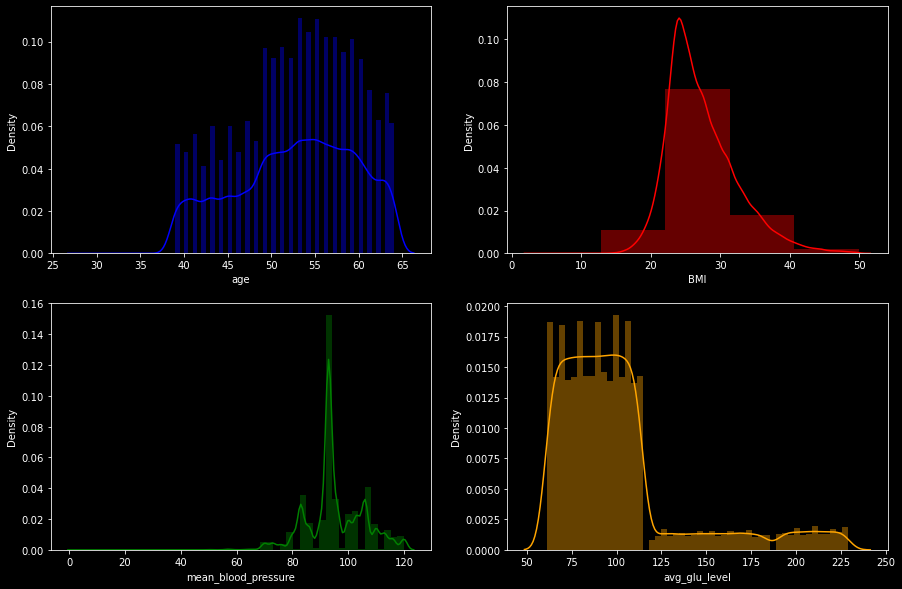

In [34]:
distplot(data_after)

#### Biểu đồ phân bố của categorical và binary data theo output (Đối với data đã được xử lí)

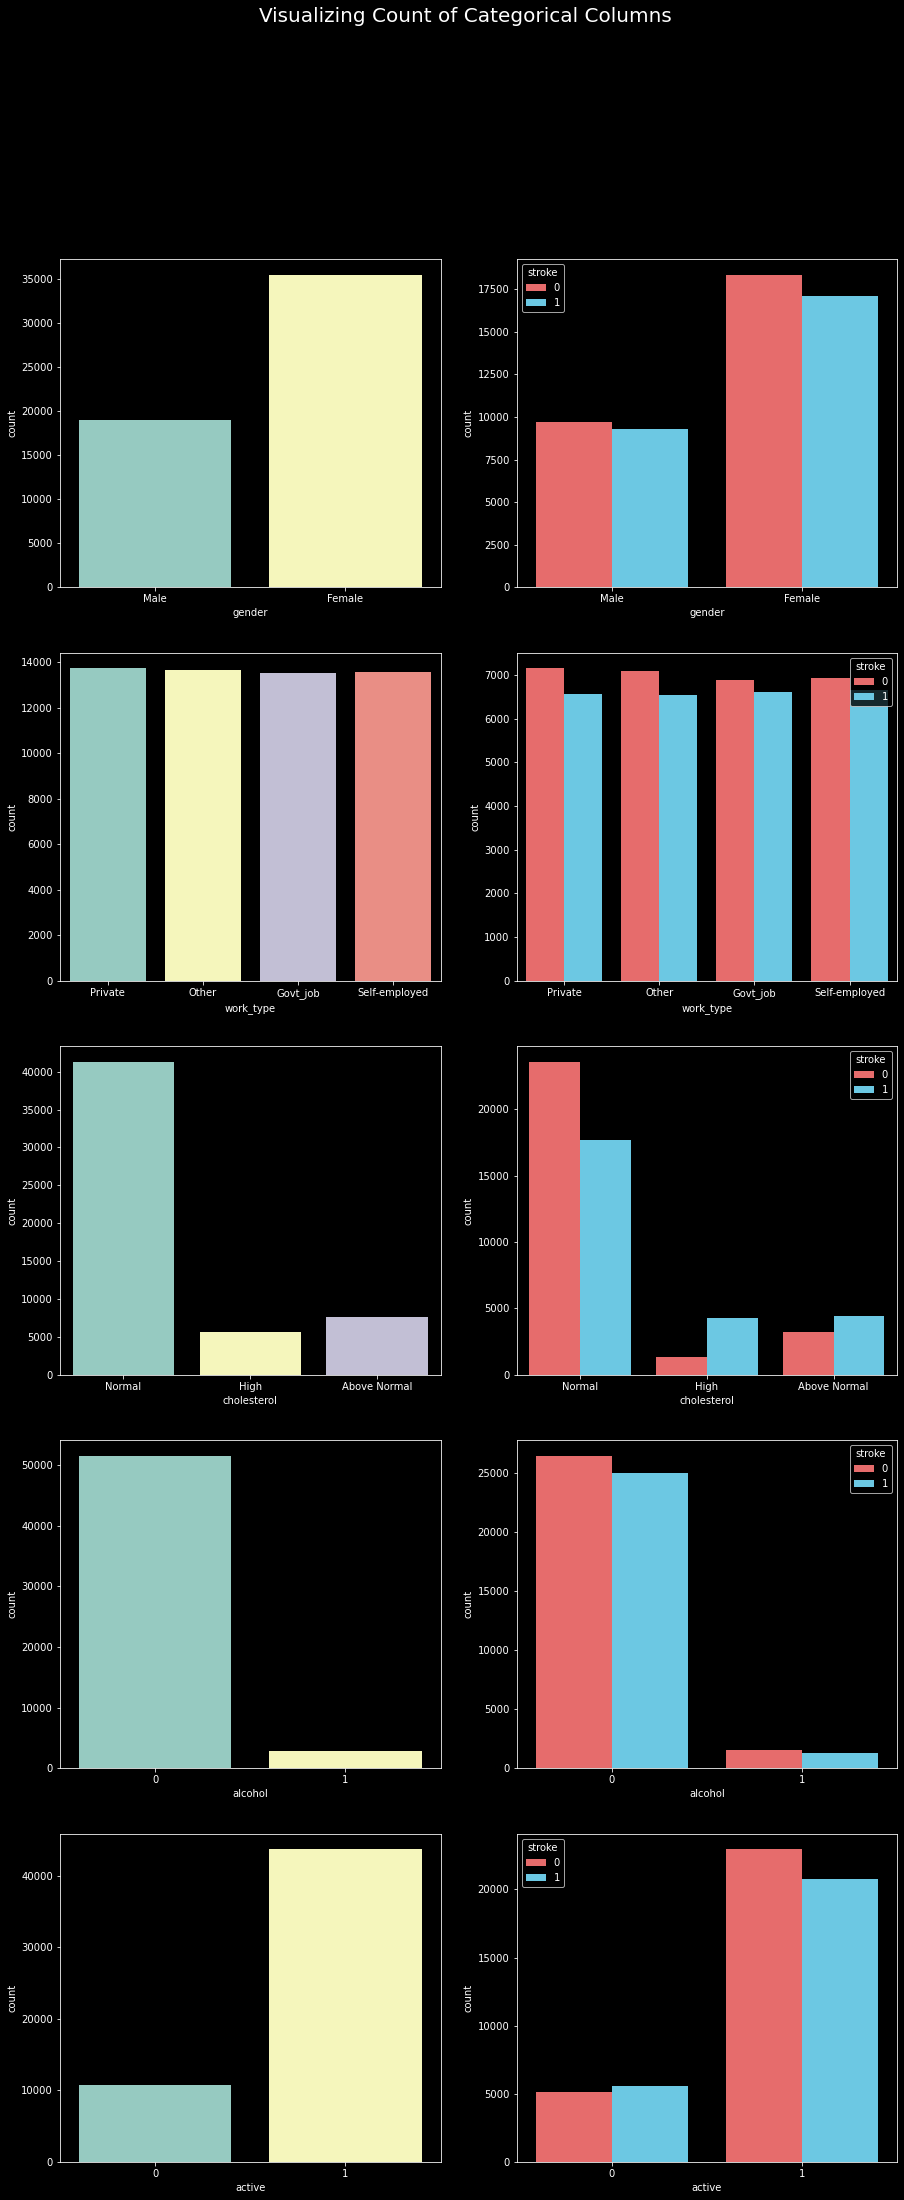

In [35]:
fig,ax=plt.subplots(5,2,figsize=(15,35))
pal = ["#FA5858", "#58D3F7"]
for index,i in enumerate(cat_cols):
    plt.suptitle("Visualizing Count of Categorical Columns",size=20)
    sns.countplot(data=data_after,x=i,ax=ax[index,0])
    sns.countplot(data=data_after,x=i,ax=ax[index,1],hue='stroke',palette = pal)

#### Biểu đồ phân bố của từng cặp feature trong tập dữ liệu

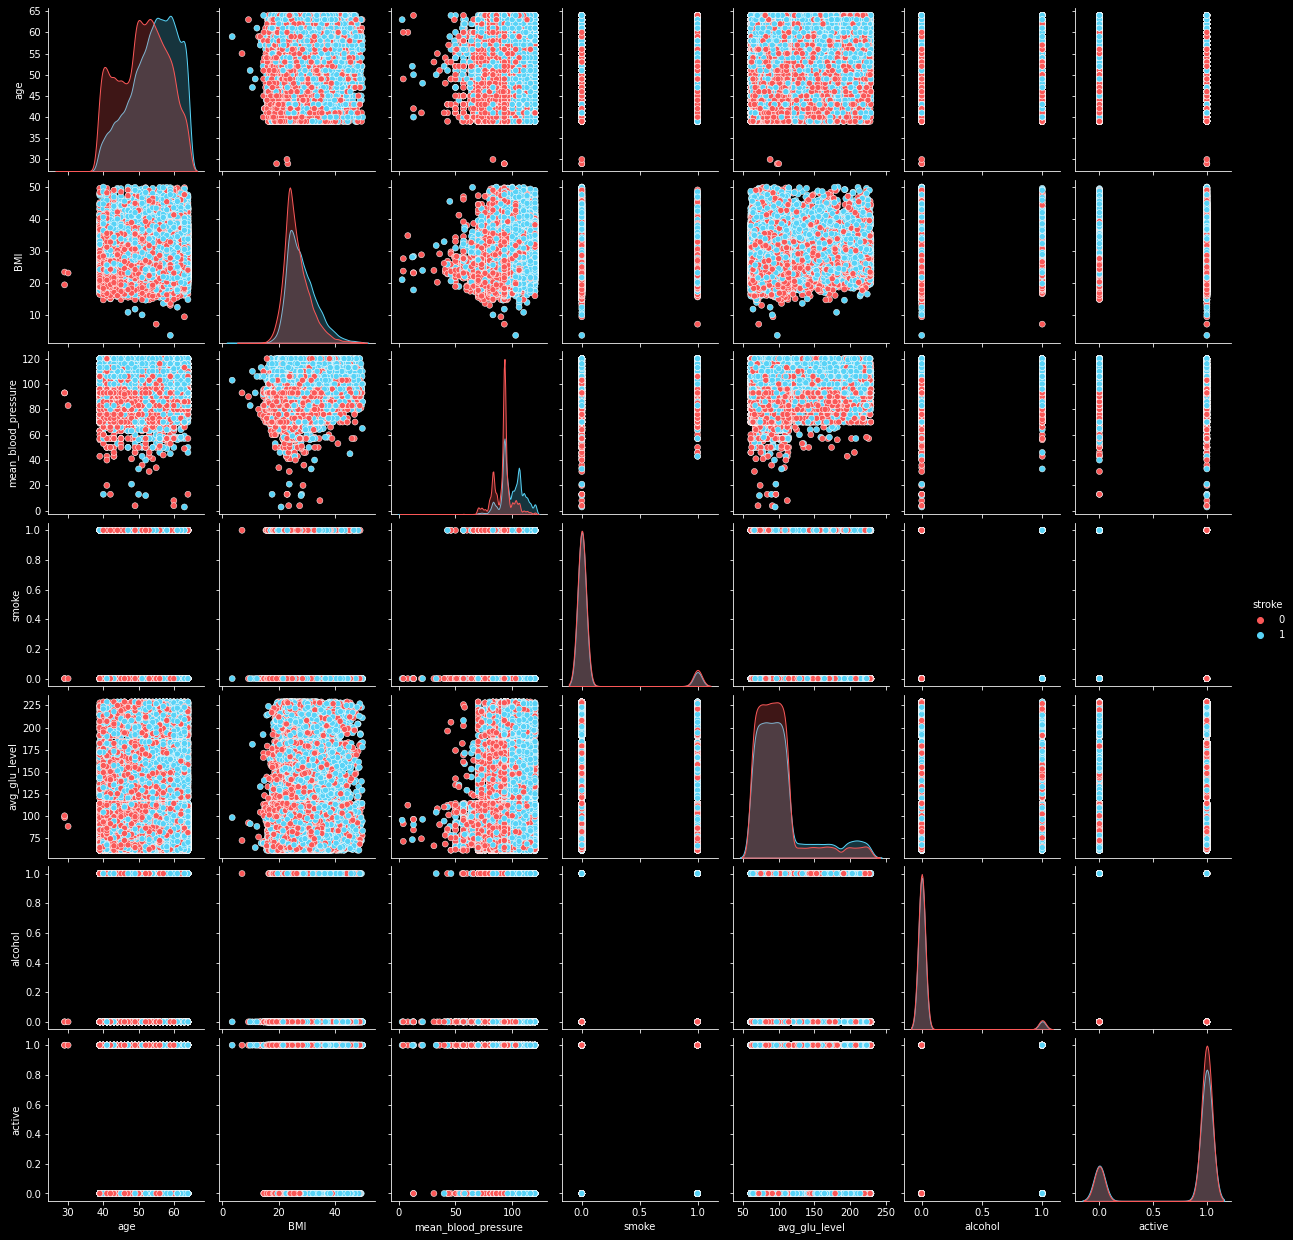

In [77]:
sns.pairplot(data=data_after,hue = 'stroke',palette = pal);

#### Ma trận hệ số tương quan Pearson

**Nhận xét:**

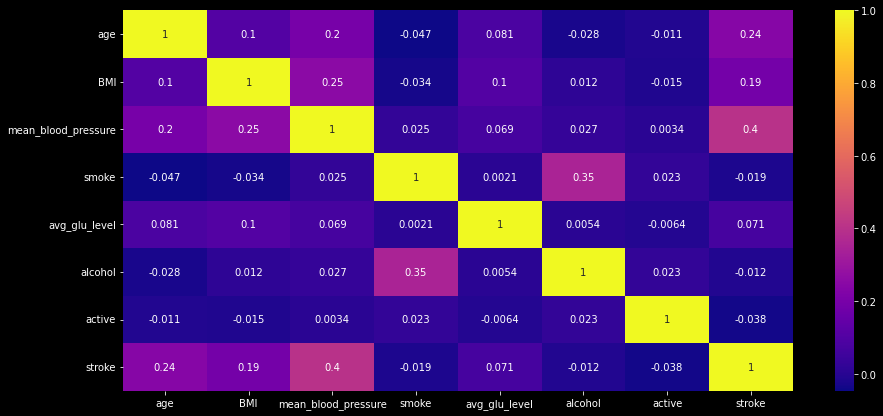

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(data_after.corr(),annot=True,cmap = plt.cm.plasma);

In [31]:
data_after.corr()['stroke'].sort_values(ascending = False)

stroke                 1.000000
mean_blood_pressure    0.400067
age                    0.236982
BMI                    0.187733
avg_glu_level          0.070801
alcohol               -0.012256
smoke                 -0.018913
active                -0.037535
Name: stroke, dtype: float64

**Nhận xét:**

<h2 id="preprocessing">3) Tiền xử lí dữ liệu (Data Preprocessing) </h2>

In [32]:
#Take a look at data
data_after

,age,gender,BMI,work_type,mean_blood_pressure,cholesterol,smoke,avg_glu_level,alcohol,active,stroke
0,50,Male,22.0,Private,90,Normal,0,94,0,1,0
1,55,Female,34.9,Other,106,High,0,97,0,1,1
2,51,Female,23.5,Govt_job,90,High,0,114,0,0,1
3,47,Female,23.0,Govt_job,73,Normal,0,71,0,0,0
4,60,Female,29.4,Private,93,Above Normal,0,156,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
54436,41,Female,25.5,Govt_job,83,Normal,0,67,0,1,1
54437,56,Female,28.5,Govt_job,103,Above Normal,0,155,0,1,0
54438,51,Female,21.6,Self-employed,116,Normal,0,83,0,1,1
54439,52,Male,26.9,Self-employed,93,Normal,1,86,0,1,0


In [33]:
# Lưu bộ data_after vào file csv
from pathlib import Path  
filepath = Path('E:\StrokeProject\Main_Project\dataset.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_after.to_csv(filepath) 

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Mã hóa Categorical Data</b></p>
</div>

Dữ liệu dạng categorical (ví dụ: Gender, work_type, cholesterol) sẽ được mã hóa dưới dạng one-hot.

In [33]:
# Sử dụng hàm gets.dummies trong thư viện pandas để mã hóa one-hot
df_dummy = data_after[['gender','work_type','cholesterol']]
df_dummy = pd.get_dummies(df_dummy)
df_dummy

,gender_Female,gender_Male,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,cholesterol_Above Normal,cholesterol_High,cholesterol_Normal
0,0,1,0,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
54436,1,0,1,0,0,0,0,0,1
54437,1,0,1,0,0,0,1,0,0
54438,1,0,0,0,0,1,0,0,1
54439,0,1,0,0,0,1,0,0,1


In [34]:
# Remove gender, work_type, cholesterol, stroke from data_after
data_temp = data_after.drop(['gender','work_type','cholesterol','stroke'],axis = 1)
data_final = pd.concat([data_temp, df_dummy], axis=1)
data_final['stroke'] = data_after['stroke']
data_final

,age,BMI,mean_blood_pressure,smoke,avg_glu_level,alcohol,active,gender_Female,gender_Male,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,cholesterol_Above Normal,cholesterol_High,cholesterol_Normal,stroke
0,50,22.0,90,0,94,0,1,0,1,0,0,1,0,0,0,1,0
1,55,34.9,106,0,97,0,1,1,0,0,1,0,0,0,1,0,1
2,51,23.5,90,0,114,0,0,1,0,1,0,0,0,0,1,0,1
3,47,23.0,73,0,71,0,0,1,0,1,0,0,0,0,0,1,0
4,60,29.4,93,0,156,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54436,41,25.5,83,0,67,0,1,1,0,1,0,0,0,0,0,1,1
54437,56,28.5,103,0,155,0,1,1,0,1,0,0,0,1,0,0,0
54438,51,21.6,116,0,83,0,1,1,0,0,0,0,1,0,0,1,1
54439,52,26.9,93,1,86,0,1,0,1,0,0,0,1,0,0,1,0


Sau khi mã hóa ta thu được bộ dữ liệu data_final.

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Chia tập dữ liệu</b></p>
</div>

In [38]:
# Ta sẽ chia tập dữ liệu data_final thành 2 tập: Train set và Test set. Trước tiên, khai báo input và output
from sklearn.model_selection import train_test_split
X = data_final.drop(['stroke'],axis=1) # Khai báo input 
y = data_final['stroke'] # Khai báo output
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)
print('Train set size: {}'.format(X_train.shape))
print('Test set size: {}'.format(X_test.shape))

Train set size: (38108, 16)
Test set size: (16333, 16)


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Chuẩn hóa dữ liệu (Data Scaling)</b></p>
</div>

In [40]:
# Ta sẽ thực hiện chuẩn hóa dữ liệu có dạng numeric để cân bằng các feature dữ liệu trước khi đưa vào train
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Khởi tạo list các biến numeric
numeric_col = ['age','BMI','mean_blood_pressure','avg_glu_level']
X_train[numeric_col]=scaler.fit_transform(X_train[numeric_col]) # Scale for train set
X_test[numeric_col]=scaler.transform(X_test[numeric_col]) # Scale for test set
X_train

,age,BMI,mean_blood_pressure,smoke,avg_glu_level,alcohol,active,gender_Female,gender_Male,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,cholesterol_Above Normal,cholesterol_High,cholesterol_Normal
44104,0.035097,-0.341170,1.039136,0,0.268427,0,0,0,1,0,0,0,1,0,0,1
15627,-1.737748,-0.781887,-0.892240,1,0.213343,1,0,0,1,0,0,1,0,0,0,1
1806,-1.590011,-0.501431,1.039136,0,-0.117163,0,0,0,1,0,1,0,0,0,0,1
34423,-1.737748,-1.042311,-1.181947,1,-0.365043,1,1,0,1,1,0,0,0,1,0,0
5568,-0.408114,0.039450,0.459723,0,-0.778176,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18207,-0.260377,2.904113,-0.505965,0,1.783247,0,1,1,0,0,0,1,0,1,0,0
32170,-0.703589,1.942548,1.425411,0,-0.475212,0,1,1,0,0,0,0,1,1,0,0
47298,-0.112640,-0.902083,-2.437341,0,-0.668007,0,1,1,0,0,0,1,0,0,0,1
2522,-0.999063,0.099547,-0.119690,1,-1.081140,1,1,0,1,1,0,0,0,0,0,1


<h2 id="modeling">4) Huấn luyện và đánh giá (Modeling and Evaluation)</h2>

Huấn luyện dữ liệu đầu vào là X_train bằng các mô hình khác nhau. So sánh độ chính xác và chọn ra mô hình tốt nhất, hoặc có thể kết hợp nhiều mô hình.

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNearest Neighbors </b></p>
</div>

In [46]:
# Ta sẽ tìm giá trị của k để thuật toán tối ưu nhất 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
knn_score = []
for i in range (60,80):
    knn = KNeighborsClassifier(n_neighbors = i,weights = 'uniform')
    knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    knn_score.append(accuracy_score(y_hat,y_test))
knn_score

[0.7153003122512704,
 0.7167085042551888,
 0.7153615379905712,
 0.7161574726014817,
 0.7162799240800832,
 0.7170146329516929,
 0.7159737953835793,
 0.7162186983407824,
 0.7161574726014817,
 0.7164023755586849,
 0.715422763729872,
 0.7165860527765873,
 0.7154839894691728,
 0.7154839894691728,
 0.7148717320761648,
 0.7153615379905712,
 0.7152390865119697,
 0.7158513439049776,
 0.7158513439049776,
 0.716647278515888]

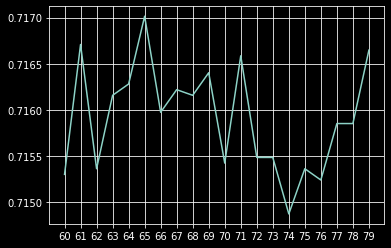

In [47]:
x_ticks = range(60,80)
x_labels = x_ticks
plt.plot([k for k in range(60,80)],knn_score)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

In [48]:
# Ta sẽ chọn k = 65 để huấn luyện bằng KNN
knn=KNeighborsClassifier(n_neighbors=65)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=65)

#### Đánh giá:

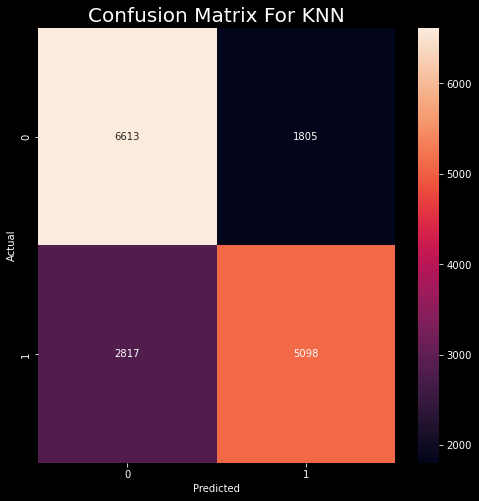

Accuracy: 0.716647278515888


In [49]:
# Đánh giá theo confusion matrix
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True,fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix For KNN',size = 20)
plt.show()
print('Accuracy: {}'.format(accuracy_score(y_hat,y_test)))

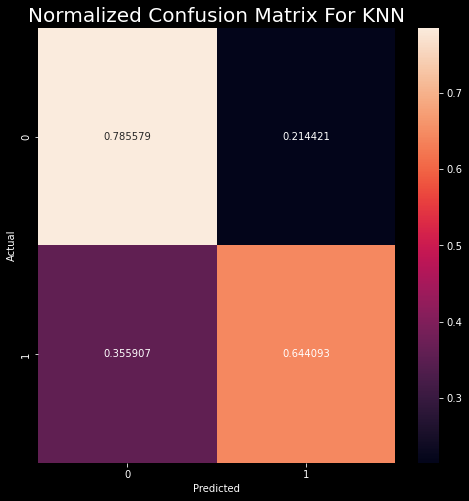

In [50]:
# Normalized confusion matrix
normalized_confusion_knn = confusion_knn.astype('float') / confusion_knn.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(normalized_confusion_knn,annot=True,fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Normalized Confusion Matrix For KNN',size = 20)
plt.show()

In [51]:
# Đánh giá theo Precision - Recall
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8418
           1       0.74      0.64      0.69      7915

    accuracy                           0.72     16333
   macro avg       0.72      0.71      0.71     16333
weighted avg       0.72      0.72      0.72     16333



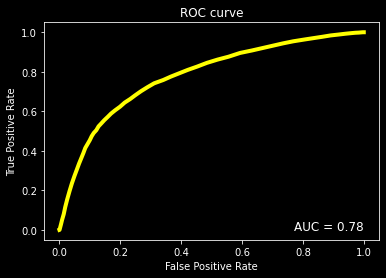

<Figure size 720x576 with 0 Axes>

In [52]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_hat_prob = knn.predict_proba(X_test)
y_prob = [0]* y_hat_prob.shape[0]
for i in range (y_hat_prob.shape[0]):
    y_prob[i] = y_hat_prob[i][1]
tpr, fpr, thresholds = roc_curve(y_test,y_prob)
ROC_AUC = roc_auc_score(y_test,y_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,color = 'yellow',linewidth = 4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.rcParams['font.size']= 12
plt.text(1,0,'AUC = {}'.format(round(ROC_AUC,2)),horizontalalignment = 'right')
plt.figure(figsize=(10,8))
plt.show()

**Nhận xét**

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Logistic Regression </b></p>
</div>

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_hat_log=log.predict(X_test)

In [54]:
print('Accuracy: ',accuracy_score(y_test,y_hat_log))

Accuracy:  0.7201371456560338


#### Đánh giá

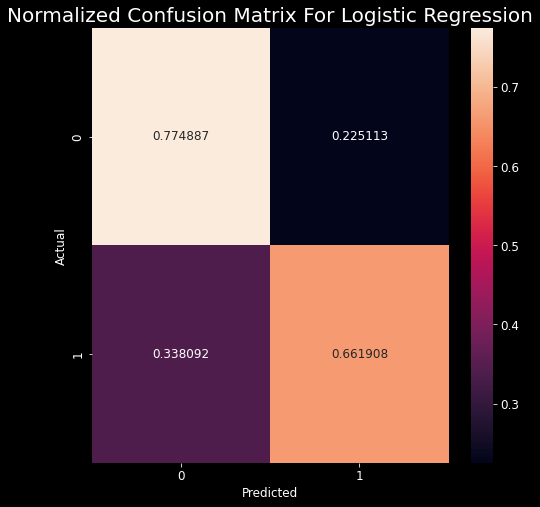

Accuracy:  0.7201371456560338


In [72]:
confusion_log=confusion_matrix(y_test,log.predict(X_test))
normalized_confusion_log = confusion_log.astype('float') / confusion_log.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(normalized_confusion_log,annot=True,fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Normalized Confusion Matrix For Logistic Regression',size = 20)
plt.show()
print('Accuracy: ',accuracy_score(y_test,y_hat_log))

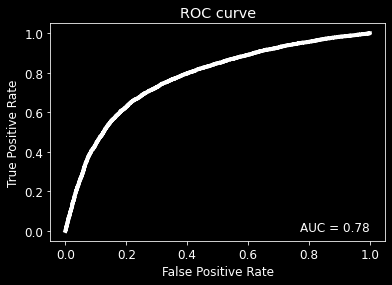

<Figure size 720x576 with 0 Axes>

In [66]:
# ROC curve
y_hat_prob_log = log.predict_proba(X_test)
y_prob_log = [0]* y_hat_prob_log.shape[0]
for i in range (y_hat_prob.shape[0]):
    y_prob_log[i] = y_hat_prob_log[i][1]
tpr, fpr, thresholds = roc_curve(y_test,y_prob_log)
ROC_AUC = roc_auc_score(y_test,y_prob_log)
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,color = 'white',linewidth = 4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.text(1,0,'AUC = {}'.format(round(ROC_AUC,2)),horizontalalignment = 'right')
plt.figure(figsize=(10,8))
plt.show()

In [77]:
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8418
           1       0.73      0.66      0.70      7915

    accuracy                           0.72     16333
   macro avg       0.72      0.72      0.72     16333
weighted avg       0.72      0.72      0.72     16333



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | RandomForest </b></p>
</div>

In [59]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
'n_estimators': [50,75,100, 150],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
print(accuracy_score(y_pred_rcv,y_test))

0.707708320577971


#### Đánh giá

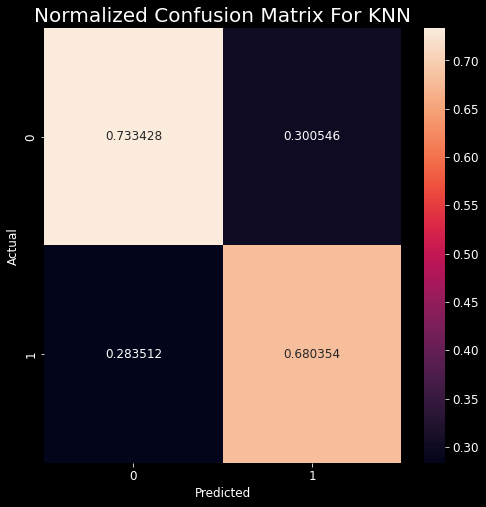

Accuracy: 0.707708320577971


In [71]:
#Confusion matrix
confusion_random = confusion_matrix(y_pred_rcv,y_test)
normalized_confusion_random = confusion_random.astype('float') / confusion_knn.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(normalized_confusion_random,annot=True,fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Normalized Confusion Matrix For KNN',size = 20)
plt.show()
print('Accuracy:', accuracy_score(y_pred_rcv,y_test))

In [78]:
print(classification_report(y_test,rcv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      8418
           1       0.71      0.68      0.69      7915

    accuracy                           0.71     16333
   macro avg       0.71      0.71      0.71     16333
weighted avg       0.71      0.71      0.71     16333



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 |GradientBoostingClassifier  </b></p>
</div>

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25],
    'n_estimators': [50, 75,100, 150],
}
gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
print(accuracy_score(y_pred_gbc,y_test))

0.728096491765138


#### Đánh giá

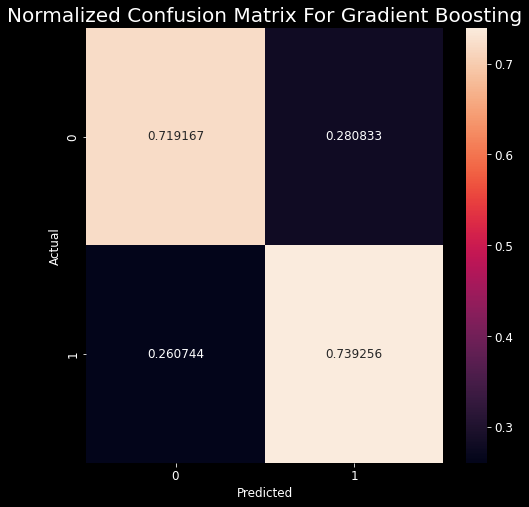

Accuracy: 0.728096491765138


In [73]:
confusion_gbc = confusion_matrix(y_pred_gbc,y_test)
normalized_confusion_gbc = confusion_gbc.astype('float') / confusion_gbc.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(normalized_confusion_gbc,annot=True,fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Normalized Confusion Matrix For Gradient Boosting',size = 20)
plt.show()
print('Accuracy:',accuracy_score(y_pred_gbc,y_test))

In [79]:
print(classification_report(y_test,gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      8418
           1       0.74      0.68      0.71      7915

    accuracy                           0.73     16333
   macro avg       0.73      0.73      0.73     16333
weighted avg       0.73      0.73      0.73     16333



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Support Vector Machine</b></p>
</div>

In [91]:
from sklearn.svm import SVC
support_vector = SVC(gamma ='auto', probability = True)
support_vector.fit(X_train,y_train)
y_pred_sup = support_vector.predict(X_test)

#### Đánh giá

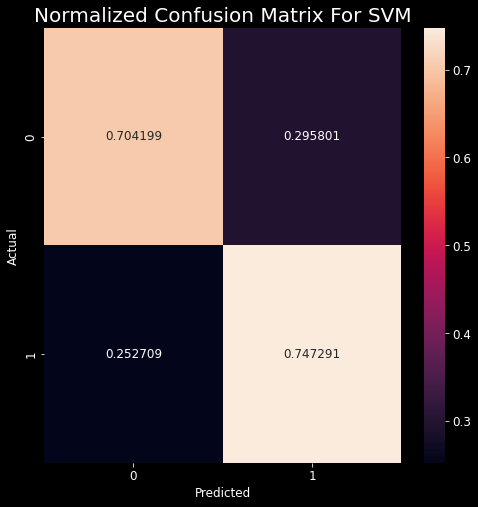

Accuracy: 0.7222188207922611


In [92]:
confusion_sup = confusion_matrix(y_pred_sup,y_test)
normalized_confusion_sup = confusion_sup.astype('float') / confusion_sup.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(normalized_confusion_sup,annot=True,fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Normalized Confusion Matrix For SVM',size = 20)
plt.show()
print('Accuracy:',accuracy_score(y_pred_sup,y_test))

In [93]:
print(classification_report(y_test,y_pred_sup))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75      8418
           1       0.75      0.64      0.69      7915

    accuracy                           0.72     16333
   macro avg       0.73      0.72      0.72     16333
weighted avg       0.73      0.72      0.72     16333



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Voting Classifier</b></p>
</div>

In [99]:
from sklearn.ensemble import VotingClassifier
clf1 = knn
clf2 = log
clf3 = gbc
clf4 = support_vector
eclf = VotingClassifier(
    estimators=[("knn", clf1), ("log", clf2), ("gbc", clf3),('svm',clf4)],
    voting="soft",
    weights=[2,1,2,2],
)
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=65)),
                             ('log',
                              RandomizedSearchCV(cv=5,
                                                 estimator=LogisticRegression(),
                                                 param_distributions={'C': [0.001,
                                                                            0.01,
                                                                            0.1,
                                                                            1,
                                                                            10,
                                                                            100],
                                                                      'max_iter': [50,
                                                                                   75,
                                                                                   100,
  

In [100]:
y_hat_voting = eclf.predict(X_test)
print(accuracy_score(y_hat_voting,y_test))

0.726259719586114


#### Đánh giá

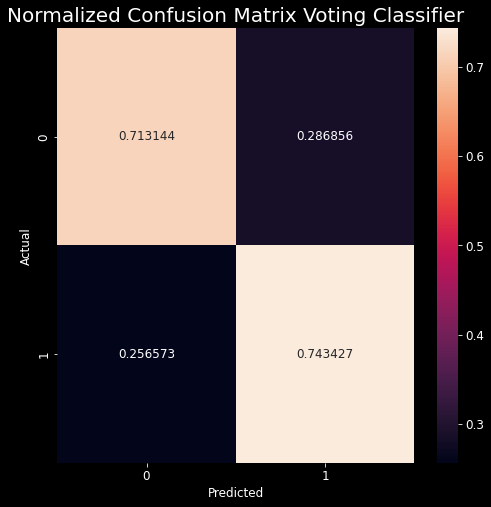

Accuracy: 0.726259719586114


In [101]:
confusion_vote = confusion_matrix(y_hat_voting,y_test)
normalized_confusion_vote = confusion_vote.astype('float') / confusion_vote.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(normalized_confusion_vote,annot=True,fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Normalized Confusion Matrix Voting Classifier',size = 20)
plt.show()
print('Accuracy:',accuracy_score(y_hat_voting,y_test))

In [102]:
print(classification_report(y_test,y_hat_voting))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      8418
           1       0.74      0.66      0.70      7915

    accuracy                           0.73     16333
   macro avg       0.73      0.72      0.72     16333
weighted avg       0.73      0.73      0.73     16333



Kết luận: Lựa chọn mô hình Voting Classifier.

<h2 id="modeling">5) Đưa ra kết quả (Output)</h2>

In [108]:
# Ta sẽ tạo một dataframe đối chiếu tập test với giá trị predict của mô hình
df_compare = pd.DataFrame({'y_test':y_test})
df_compare

,y_test
26379,0
27987,0
15706,0
47395,1
35500,0
...,...
14040,0
52470,0
16440,0
28877,0


In [112]:
# Hiển thị xác suất cho từng class đối với dữ liệu của tập X_test 
predict = eclf.predict_proba(X_test)

(16333, 2)


In [113]:
# predict[:,0] là cột xác suất cho class 0 của mỗi điểm dữ liệu, predict[:,1] là là cột xác suất cho class 1
predict

array([[0.67195938, 0.32804062],
       [0.77526214, 0.22473786],
       [0.6235163 , 0.3764837 ],
       ...,
       [0.50408261, 0.49591739],
       [0.72425876, 0.27574124],
       [0.69714666, 0.30285334]])

In [115]:
# Đưa vào data_compare
df_compare['Prob_0'] = predict[:,0]
df_compare['Prob_1'] = predict[:,1]
df_compare

,y_test,Prob_0,Prob_1
26379,0,0.671959,0.328041
27987,0,0.775262,0.224738
15706,0,0.623516,0.376484
47395,1,0.329946,0.670054
35500,0,0.885729,0.114271
...,...,...,...
14040,0,0.618206,0.381794
52470,0,0.368333,0.631667
16440,0,0.504083,0.495917
28877,0,0.724259,0.275741


In [116]:
print('Accuracy:',accuracy_score(y_hat_voting,y_test))

Accuracy: 0.726259719586114
